In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/project2_data')

Mounted at /content/drive


In [1]:
import pandas as pd
clear = pd.read_csv('/Users/hazel/Documents/credit_project_data/application_clear_newlabel.csv',index_col=0 )
clear

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,total_label
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,1,0,...,0,1,0,0,0,0,0,1,0,4.558868
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,1,0,...,0,1,1,0,0,0,0,0,0,-1.468816
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,0,0,0,-2.524768
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,1,0,...,0,0,0,0,0,0,0,0,0,0.574245
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,1,0,...,0,0,0,0,0,0,0,0,0,-1.157093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0,0,0,0,0,-1.373230
356251,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,1,0,...,0,0,0,0,0,0,0,0,0,-1.127277
356252,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,1,0,...,0,1,0,0,0,0,0,1,0,2.734850
356253,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,0,1,0,0,0,0,1,0,0,2.899147


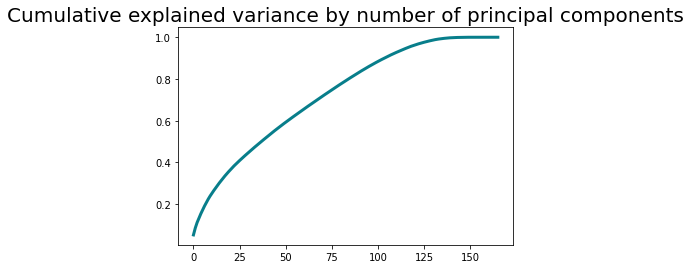

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X = clear.iloc[:, 2:]
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)
pca = PCA().fit(Z_sk)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()


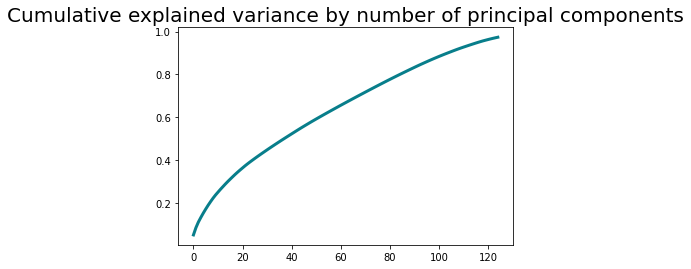

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X = clear.iloc[:, 2:]
scaler = StandardScaler()
Z_sk = scaler.fit_transform(X)
pca = PCA(n_components=125).fit(Z_sk)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

In [ ]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    # columns=[f'PC{i}' for i in range(1, len(X.columns) + 1)],
    # columns=[f'PC{i}' for i in range(1, 3)],
    columns=[f'PC{i}' for i in range(1, 126)],
    index=X.columns
)
loadings.sort_values(by=['PC1'], ascending=False).head(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
PREV_CREDIT_max,0.800540,0.265017,-0.045696,0.121008,0.134961,0.006497,-0.032031,-0.031139,0.082732,0.085843,...,-0.009924,-0.000875,-0.000391,0.035176,-0.108181,0.013849,0.007136,0.003156,0.005664,0.009415
PORTFOLIO_Cash,0.794644,0.050399,-0.215525,0.004915,0.011719,-0.020001,-0.001847,-0.145828,0.059647,-0.021371,...,-0.043728,0.005021,-0.038676,-0.006783,-0.029432,0.004622,0.008836,0.002332,0.000267,0.016384
CONTRACT_Cash_loans,0.794432,0.050811,-0.215817,0.004693,0.011129,-0.020522,-0.001251,-0.145621,0.058997,-0.021413,...,-0.044343,0.004917,-0.038802,-0.007833,-0.029789,0.004439,0.009016,0.002308,0.000378,0.016470
PREV_GOODS_PRICE_max,0.786411,0.264967,-0.037423,0.128480,0.138488,0.018344,-0.032671,-0.028445,0.084433,0.096751,...,-0.001496,0.000300,0.000848,0.034409,-0.098303,0.012632,0.006260,0.003089,0.006442,0.005275
PREV_APPLICATION_max,0.782787,0.255680,-0.039301,0.139731,0.164271,0.003336,-0.031121,-0.040197,0.094810,0.092508,...,-0.009719,-0.000763,-0.002149,0.037054,-0.112039,0.013846,0.007315,0.003254,0.006221,0.000616
PREV_CREDIT_sum,0.740598,0.222987,-0.019116,0.078363,0.101637,-0.034457,-0.008641,-0.056434,0.047710,-0.030696,...,-0.032651,0.001432,0.003433,-0.034424,0.012710,-0.006623,0.014217,0.001579,0.008836,0.167211
PC_CNT_INSTALMENT_max,0.700409,0.065679,-0.105684,-0.020527,0.109675,-0.137587,-0.087237,0.004240,0.052334,-0.071081,...,-0.090511,0.016797,-0.029309,0.079866,0.064304,0.001247,-0.004785,-0.003891,-0.039124,-0.178415
PC_CNT_INSTALMENT_mean,0.585978,0.037078,-0.211591,0.062978,0.088032,-0.128712,-0.022104,0.019077,0.060171,0.137467,...,-0.030765,0.007406,-0.000943,0.027381,0.079293,-0.002446,-0.006203,-0.007369,-0.013159,-0.108837
SK_NUM_PREV,0.537194,0.083942,0.144123,-0.194072,0.022451,-0.057701,-0.174314,-0.033462,-0.036443,-0.514107,...,-0.047150,0.023557,-0.052214,0.025377,0.128441,-0.013532,0.014505,0.001399,-0.015940,0.043976
AMT_REQ_CREDIT_BUREAU_YEAR,0.533318,0.111580,-0.131058,-0.078334,-0.080360,-0.036204,-0.031983,0.015819,-0.097250,-0.199491,...,0.263687,-0.046206,0.180564,-0.224935,-0.211386,0.012933,-0.087071,-0.007952,0.010067,-0.114632


In [ ]:
result = pd.DataFrame(loadings.sum(axis=1),columns=['scores'])
# result
result.sort_values(by=['scores'], ascending=False).head(20)

,scores
AMT_INCOME_TOTAL,4.113230
bureau_AMT_CREDIT_SUM_LIMIT,3.271696
PREV_GOODS_PRICE_max,2.561619
PREV_APPLICATION_max,2.472838
PREV_CREDIT_max,2.423023
bureau_AMT_CREDIT_SUM_OVERDUE,2.348156
AMT_REQ_CREDIT_BUREAU_QRT,2.328310
PREV_DOWN_PAYMENT_median,2.184385
PREV_CREDIT_sum,2.182605
PREV_ANNUITY_median,2.145436


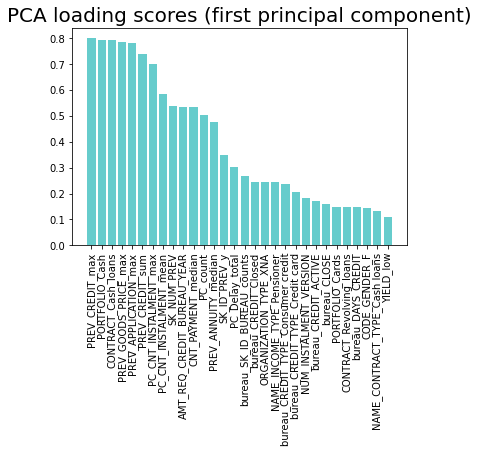

In [ ]:
#
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings
pc1_loadings = pc1_loadings.iloc[:30,:].reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#66CCCC')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# 卡方檢定
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
X_train = clear.iloc[:, 2:]
y = clear.iloc[:,1]    #target variable i.e price range

# Create scaler
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Scale feature
X = minmax_scale.fit_transform(X_train)

#apply SelectKBest class to extract top 10 best features

BestFeatures = SelectKBest(score_func=chi2, k=20)
fit = BestFeatures.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)
f_Scores = pd.concat([df_columns,df_scores],axis=1)               # feature scores
f_Scores.columns = ['Specs','Score']  
f_Scores.sort_values(by='Score', ascending=False).head(20)

,Specs,Score
17,REG_CITY_NOT_WORK_CITY,615.377434
30,CODE_GENDER_M,606.035521
16,REG_CITY_NOT_LIVE_CITY,558.708941
40,NAME_INCOME_TYPE_Pensioner,538.416471
90,ORGANIZATION_TYPE_XNA,533.222197
42,NAME_INCOME_TYPE_Working,491.439930
59,OCCUPATION_TYPE_Laborers,466.960337
29,CODE_GENDER_F,314.404540
18,LIVE_CITY_NOT_WORK_CITY,266.788515
28,NAME_CONTRACT_TYPE_Revolving loans,265.588342


In [ ]:
# 卡方檢定
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
num_feats = 20
X_train = clear.iloc[:, 2:].drop(columns=[''])
y = clear.iloc[:,1]
X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

20 selected features


In [ ]:
chi_feature

['DAYS_BIRTH',
 'FLAG_WORK_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_Working',
 'NAME_HOUSING_TYPE_With parents',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Laborers',
 'OCCUPATION_TYPE_Low-skill Laborers',
 'ORGANIZATION_TYPE_Self-employed',
 'ORGANIZATION_TYPE_XNA',
 'HOUSETYPE_MODE_block of flats',
 'WALLSMATERIAL_MODE_Panel',
 'EMERGENCYSTATE_MODE_No',
 'YIELD_high']

In [7]:
# RandomForest Feature Selector
# create the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier

X = clear.iloc[:, :-1].drop(columns=['SK_ID_CURR'])
y = clear.iloc[:,-1].astype('int')

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X, y)
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
feature_scores

DAYS_LAST_PHONE_CHANGE                      0.071344
DAYS_REGISTRATION                           0.070306
DAYS_BIRTH                                  0.069690
DAYS_ID_PUBLISH                             0.069651
AMT_INCOME_TOTAL                            0.057442
DAYS_EMPLOYED                               0.055586
HOUR_APPR_PROCESS_START                     0.051648
OBS_60_CNT_SOCIAL_CIRCLE                    0.033606
AMT_REQ_CREDIT_BUREAU_YEAR                  0.029260
CNT_FAM_MEMBERS                             0.019403
FLAG_PHONE                                  0.013801
CNT_CHILDREN                                0.013612
NAME_EDUCATION_TYPE                         0.011981
WEEKDAY_APPR_PROCESS_START_TUESDAY          0.011311
WEEKDAY_APPR_PROCESS_START_WEDNESDAY        0.010974
WEEKDAY_APPR_PROCESS_START_THURSDAY         0.010817
FLAG_OWN_CAR_Y                              0.010719
WEEKDAY_APPR_PROCESS_START_FRIDAY           0.010691
WEEKDAY_APPR_PROCESS_START_MONDAY           0.

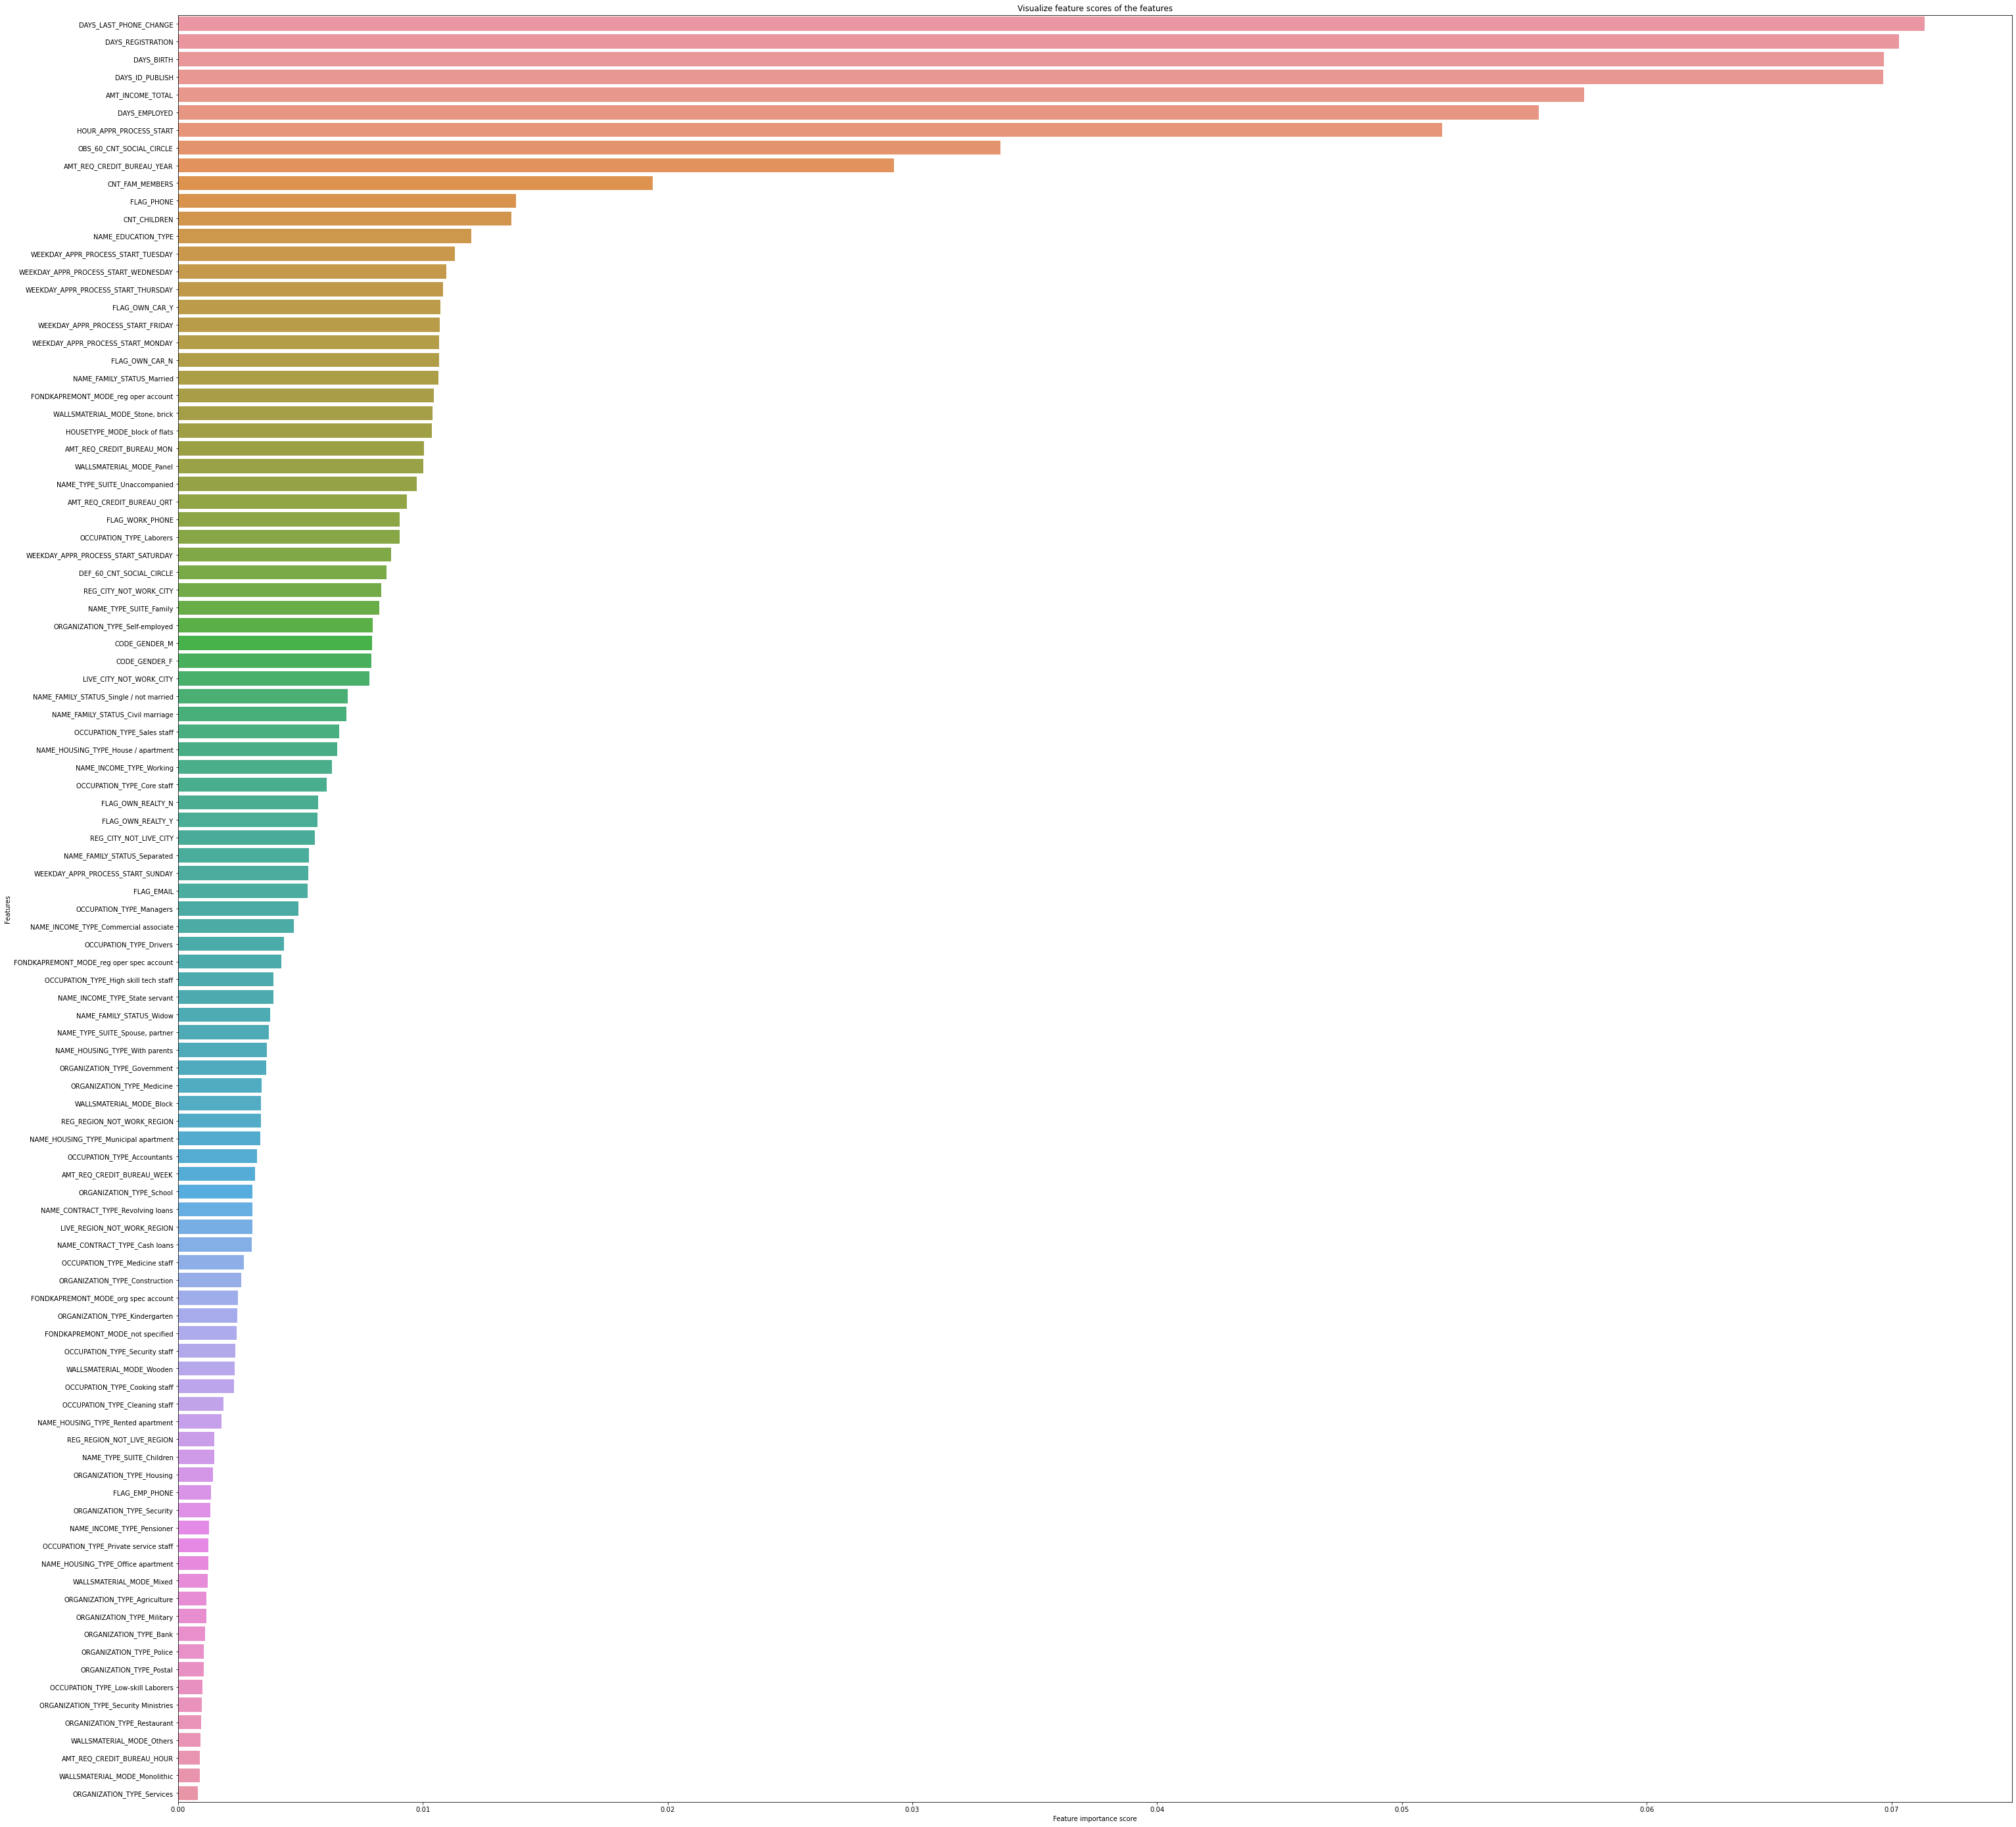

In [8]:
# Creating a seaborn bar plot
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(50, 50))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

# REF (late_count_inLoan / Loan_count)

In [1]:
import pandas as pd
chao_label = pd.read_csv('/Users/hazel/Documents/credit_project_data/Jen-Chao Huang/processed_allHC_label.csv')
chao_label

,SK_ID_CURR,Loan_count,late_count_inLoan,INSTALMENT_count,late_count_total
0,100001,4.0,1.0,16.0,2.0
1,100002,2.0,0.0,38.0,0.0
2,100003,6.0,0.0,53.0,0.0
3,100004,2.0,0.0,7.0,0.0
4,100005,2.0,1.0,20.0,2.0
...,...,...,...,...,...
340360,448526,1.0,0.0,8.0,0.0
340361,449328,1.0,0.0,8.0,0.0
340362,451328,1.0,0.0,12.0,0.0
340363,451362,1.0,0.0,96.0,0.0


In [2]:
chao_label['late_count_inLoan / Loan_count'] = chao_label['late_count_inLoan']/chao_label['Loan_count']
chao_label

,SK_ID_CURR,Loan_count,late_count_inLoan,INSTALMENT_count,late_count_total,late_count_inLoan / Loan_count
0,100001,4.0,1.0,16.0,2.0,0.25
1,100002,2.0,0.0,38.0,0.0,0.00
2,100003,6.0,0.0,53.0,0.0,0.00
3,100004,2.0,0.0,7.0,0.0,0.00
4,100005,2.0,1.0,20.0,2.0,0.50
...,...,...,...,...,...,...
340360,448526,1.0,0.0,8.0,0.0,0.00
340361,449328,1.0,0.0,8.0,0.0,0.00
340362,451328,1.0,0.0,12.0,0.0,0.00
340363,451362,1.0,0.0,96.0,0.0,0.00


<AxesSubplot:>

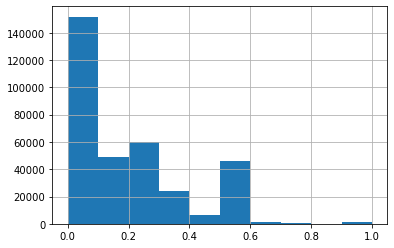

In [3]:
chao_label['late_count_inLoan / Loan_count'].hist()

,late_count_inLoan / Loan_count
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0
...,...
340360,0.0
340361,0.0
340362,0.0
340363,0.0


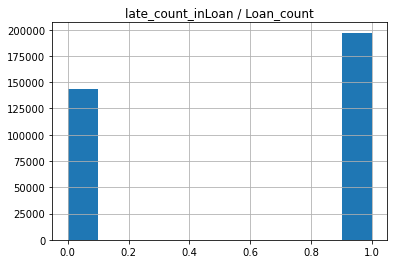

In [4]:
chao_label_y = pd.DataFrame(chao_label['late_count_inLoan / Loan_count'].apply(lambda x:1 if x>0 else x))
chao_label_y.hist()
chao_label_y

In [5]:
SK_ID_CURR = chao_label['SK_ID_CURR']
new_label = pd.concat([SK_ID_CURR,chao_label_y],axis=1)
new_label

,SK_ID_CURR,late_count_inLoan / Loan_count
0,100001,1.0
1,100002,0.0
2,100003,0.0
3,100004,0.0
4,100005,1.0
...,...,...
340360,448526,0.0
340361,449328,0.0
340362,451328,0.0
340363,451362,0.0


In [6]:
data = pd.read_csv('/Users/hazel/Documents/credit_project_data/application_clear_newlabel.csv',index_col=0)
data

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,total_label
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,1,0,...,0,1,0,0,0,0,0,1,0,4.558868
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,1,0,...,0,1,1,0,0,0,0,0,0,-1.468816
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,0,0,0,-2.524768
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,1,0,...,0,0,0,0,0,0,0,0,0,0.574245
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,1,0,...,0,0,0,0,0,0,0,0,0,-1.157093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0,0,0,0,0,-1.373230
356251,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,1,0,...,0,0,0,0,0,0,0,0,0,-1.127277
356252,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,1,0,...,0,1,0,0,0,0,0,1,0,2.734850
356253,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,0,1,0,0,0,0,1,0,0,2.899147


In [7]:
data.drop(['total_label'],axis=1,inplace=True)
data

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden
0,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,1,0,...,1,0,1,0,0,0,0,0,1,0
1,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,1,0,...,1,0,1,1,0,0,0,0,0,0
2,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,135000.0,1,-19005,-3039,-9833.0,-2437,1,0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,121500.0,1,-19932,-3038,-4311.0,-3458,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356250,456221,0,121500.0,1,-19970,-5169,-9094.0,-3399,1,1,...,0,0,0,0,0,0,0,0,0,0
356251,456222,2,157500.0,1,-11186,-1149,-3015.0,-3003,1,0,...,0,0,0,0,0,0,0,0,0,0
356252,456223,1,202500.0,1,-15922,-3037,-2681.0,-1504,1,0,...,0,0,1,0,0,0,0,0,1,0
356253,456224,0,225000.0,3,-13968,-2731,-1461.0,-1364,1,1,...,0,0,1,0,0,0,0,1,0,0


In [8]:
new_data = data.merge(new_label,left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='right')
new_data

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,late_count_inLoan / Loan_count
0,100001,0,135000.0,3,-19241,-2329,-5170.0,-812,1,0,...,0,1,0,0,0,0,0,1,0,1.0
1,100002,0,202500.0,1,-9461,-637,-3648.0,-2120,1,0,...,0,1,0,0,0,0,0,1,0,0.0
2,100003,0,270000.0,3,-16765,-1188,-1186.0,-291,1,0,...,0,1,1,0,0,0,0,0,0,0.0
3,100004,0,67500.0,1,-19046,-225,-4260.0,-2531,1,1,...,0,0,0,0,0,0,0,0,0,0.0
4,100005,0,99000.0,1,-18064,-4469,-9118.0,-1623,1,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340360,448526,0,271651.5,3,-8772,-422,-3454.0,-1428,1,1,...,0,0,0,0,0,0,0,0,0,0.0
340361,449328,0,103500.0,1,-16265,-674,-29.0,-4400,1,1,...,0,0,0,0,0,0,0,0,0,0.0
340362,451328,0,108000.0,3,-9335,-662,-3801.0,-1981,1,0,...,0,0,0,0,0,0,0,0,0,0.0
340363,451362,2,337500.0,3,-14116,-1936,-8242.0,-539,1,0,...,1,1,0,0,0,0,0,1,0,0.0


In [10]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
X = new_data.iloc[:,:-1]
y = new_data[['late_count_inLoan / Loan_count']]
# create pipeline
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X,y)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=3, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_rfe.py:296: DataConversi

Accuracy: 0.590 (0.031)


In [11]:
rfe.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False, False, False,
       False, False,  True, False,  True, False, False, False,  True,
        True, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False])

In [12]:
features_ref=rfe.get_support()

In [13]:
features_ref=X.columns[rfe.get_support()]

In [14]:
features_ref

Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'CODE_GENDER_F', 'FLAG_OWN_CAR_N', 'NAME_INCOME_TYPE_Working',
       'WEEKDAY_APPR_PROCESS_START_TUESDAY', 'HOUSETYPE_MODE_block of flats'],
      dtype='object')